# Introduction

The data used in this report is from **September 2023**, sourced from the U.S. Department of Transportation’s Bureau of Transportation Statistics (BTS). The analysis covers key airline performance metrics, including flight cancellations, flight distances, and the number of flights.


In [2]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data
al_perf = pd.read_csv("../../project data/Data/al_perf.csv")
L_AIRLINE_ID = pd.read_csv("../../project data/Data/L_AIRLINE_ID.csv")
L_AIRPORT_ID = pd.read_csv("../../project data/Data/L_AIRPORT_ID.csv")
L_AIRPORT = pd.read_csv("../../project data/Data/L_AIRPORT.csv")
L_CANCELATION = pd.read_csv("../../project data/Data/L_CANCELATION.csv")
L_DISTANCE_GROUP_250 = pd.read_csv("../../project data/Data/L_DISTANCE_GROUP_250.csv")
L_WEEKDAYS = pd.read_csv("../../project data/Data/L_WEEKDAYS.csv")


/var/folders/fd/zfxd46k90qd0bd_xk04w45r40000gn/T/ipykernel_91685/3007574736.py:6: DtypeWarning: Columns (69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  al_perf = pd.read_csv("../../project data/Data/al_perf.csv")


# 1. Airlines Performance Analysis

In [3]:
# Merge airline names into al_perf using airline ID
al_perf = al_perf.merge(
    L_AIRLINE_ID, 
    how='left', 
    left_on='DOT_ID_Reporting_Airline',  # Column in al_perf with airline ID
    right_on='ID'                        # Column in L_AIRLINE_ID with airline ID
)

# Group by airline name and aggregate key metrics
airline_perf = al_perf.groupby("Name").agg(
    avg_arr_delay=("ArrDelay", "mean"),   # Average arrival delay per airline
    avg_dep_delay=("DepDelay", "mean"),   # Average departure delay per airline
    total_cancel=("Cancelled", "sum"),    # Total number of cancelled flights per airline
    total_flights=("Flights", "sum")      # Total number of flights per airline
).reset_index()

# Calculate cancellation rate
airline_perf["cancel_rate"] = airline_perf["total_cancel"] / airline_perf["total_flights"]



In [4]:
airline_perf["cancel_rate"] = airline_perf["total_cancel"] / airline_perf["total_flights"]

,Name,avg_arr_delay,avg_dep_delay,total_cancel,total_flights,cancel_rate
0,Alaska Airlines Inc.: AS,1.601164,4.795336,87.0,21426.0,0.004060
1,Allegiant Air: G4,9.306200,11.010626,22.0,6892.0,0.003192
2,American Airlines Inc.: AA,8.611584,14.786057,640.0,76972.0,0.008315
3,Delta Air Lines Inc.: DL,1.125506,8.480439,418.0,81701.0,0.005116
4,Endeavor Air Inc.: 9E,2.227870,9.191383,777.0,17319.0,0.044864
5,Envoy Air: MQ,2.458077,6.411086,69.0,18789.0,0.003672
6,Frontier Airlines Inc.: F9,14.096099,17.645867,329.0,16353.0,0.020119
7,Hawaiian Airlines Inc.: HA,2.130003,3.229774,69.0,6718.0,0.010271
8,JetBlue Airways: B6,29.581846,33.672844,724.0,21412.0,0.033813
9,PSA Airlines Inc.: OH,3.121519,7.892117,232.0,16175.0,0.014343


/var/folders/fd/zfxd46k90qd0bd_xk04w45r40000gn/T/ipykernel_91685/4214137305.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='avg_arr_delay', y='Name', data=data, palette="viridis")


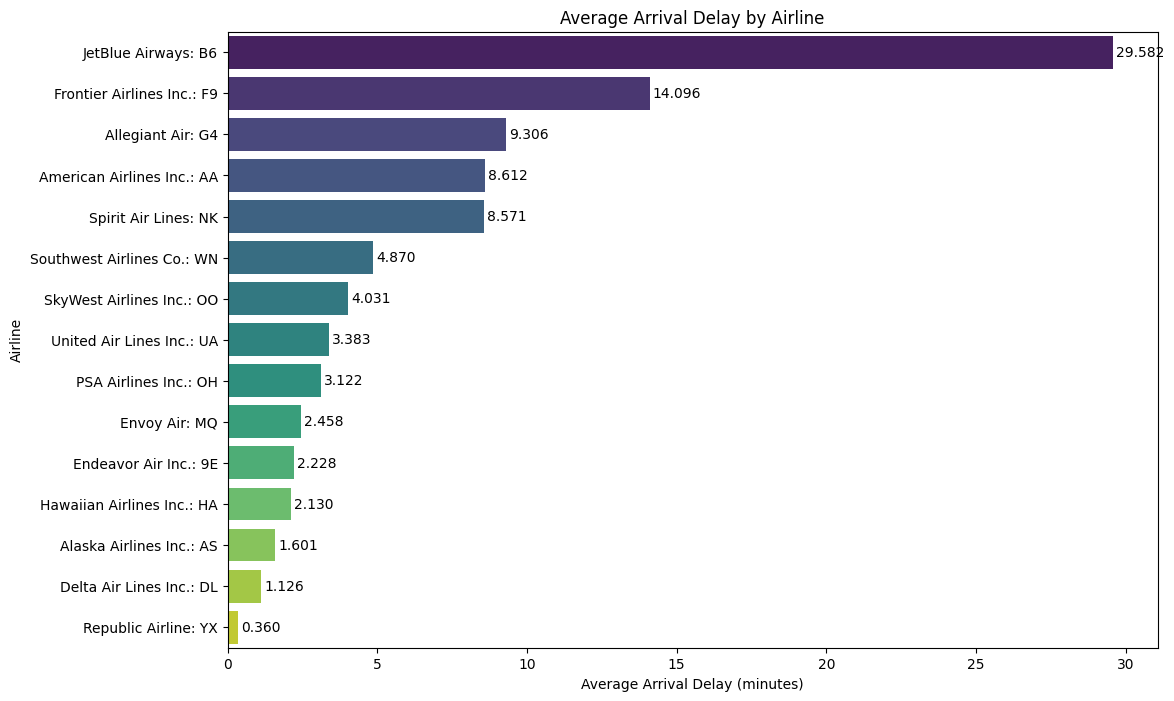

In [5]:
# 1. Average Arrival Delay
data = airline_perf.sort_values('avg_arr_delay', ascending=False)
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='avg_arr_delay', y='Name', data=data, palette="viridis")
for i, v in enumerate(data['avg_arr_delay']):
    ax.text(v + 0.1, i, f"{v:.3f}", color='black', va='center')  

plt.title("Average Arrival Delay by Airline")
plt.xlabel("Average Arrival Delay (minutes)")
plt.ylabel("Airline")
plt.show()


/var/folders/fd/zfxd46k90qd0bd_xk04w45r40000gn/T/ipykernel_91685/3867151348.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='avg_dep_delay', y='Name', data=data, palette="magma")


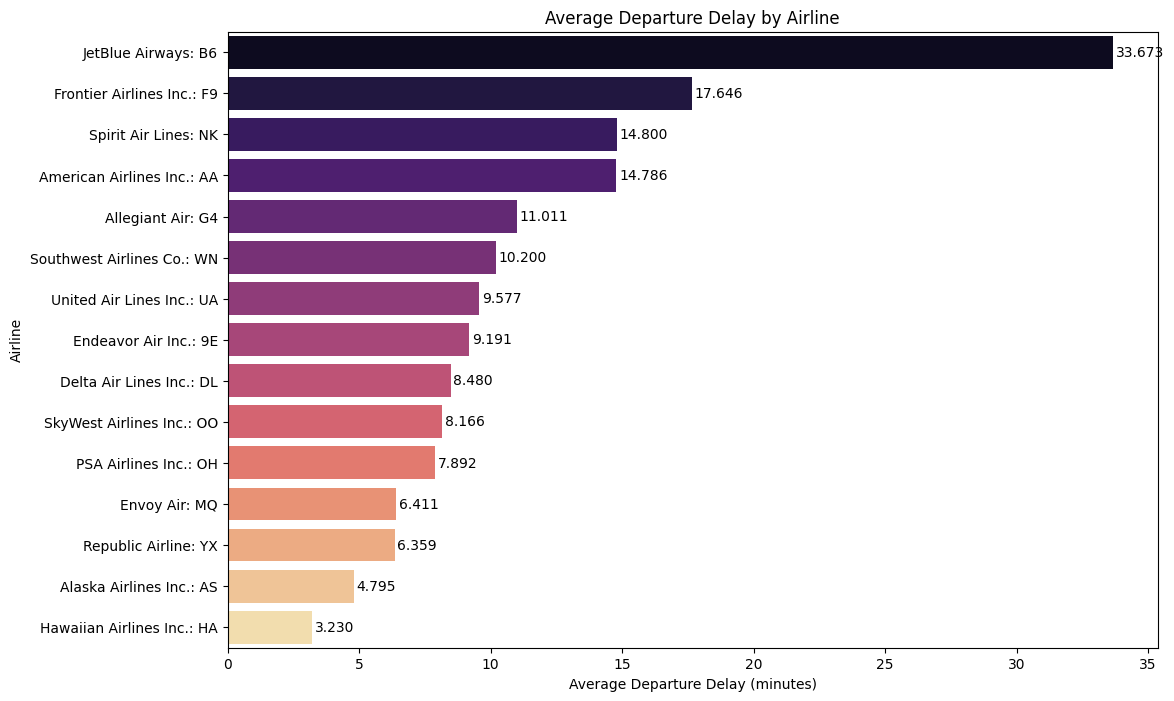

In [6]:
# 2. Average Departure Delay
data = airline_perf.sort_values('avg_dep_delay', ascending=False)
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='avg_dep_delay', y='Name', data=data, palette="magma")
for i, v in enumerate(data['avg_dep_delay']):
    ax.text(v + 0.1, i, f"{v:.3f}", color='black', va='center')  
    
plt.title("Average Departure Delay by Airline")
plt.xlabel("Average Departure Delay (minutes)")
plt.ylabel("Airline")
plt.show()


/var/folders/fd/zfxd46k90qd0bd_xk04w45r40000gn/T/ipykernel_91685/3656850973.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='total_cancel', y='Name', data=data, palette="coolwarm")


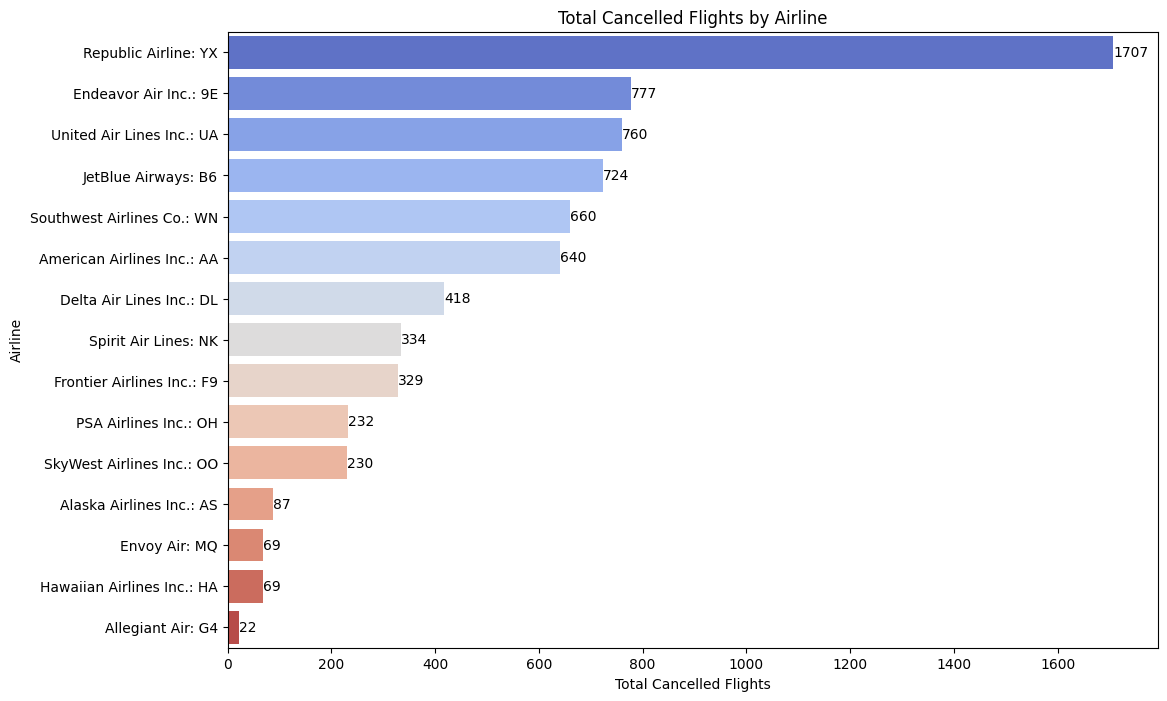

In [7]:
# 3. Total Cancelled Flights
data = airline_perf.sort_values('total_cancel', ascending=False)
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='total_cancel', y='Name', data=data, palette="coolwarm")
for i, v in enumerate(data['total_cancel']):
    
    ax.text(v + 0.1, i, f"{v:.0f}", color='black', va='center')  
plt.title("Total Cancelled Flights by Airline")
plt.xlabel("Total Cancelled Flights")
plt.ylabel("Airline")
plt.show()



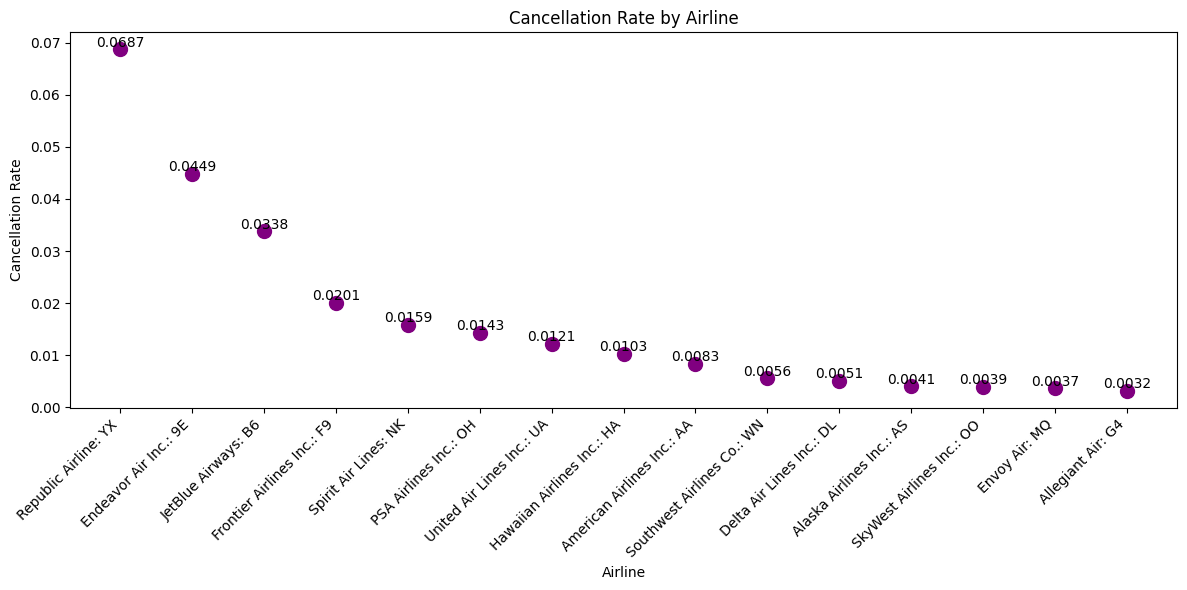

In [8]:
# 4. Cancellation Rate - Scatter plot
data = airline_perf.sort_values('cancel_rate', ascending=False)
plt.figure(figsize=(12, 6))
plt.scatter(data['Name'], data['cancel_rate'], s=100, color='purple')
for i, v in enumerate(data['cancel_rate']):
    plt.text(i, v + 0.0005, f"{v:.4f}", ha='center')
plt.xticks(rotation=45, ha='right')
plt.title("Cancellation Rate by Airline")
plt.xlabel("Airline")
plt.ylabel("Cancellation Rate")
plt.tight_layout()
plt.show()

# 2. Analysis of Cancellation of Flights

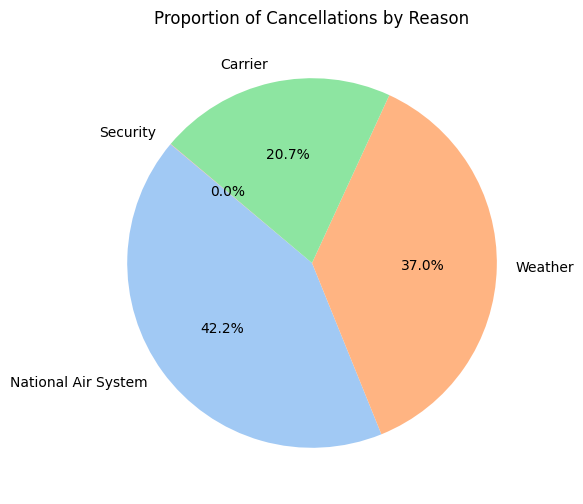

In [9]:
cancel_df = pd.read_csv("../csv/cancel.csv")  # Cancellations by reason
plt.figure(figsize=(6,6))
plt.pie(cancel_df['Number_Of_Cancellations'],
        labels=cancel_df['Cancellation_Reason'],
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette("pastel"))
plt.title("Proportion of Cancellations by Reason")
plt.show()

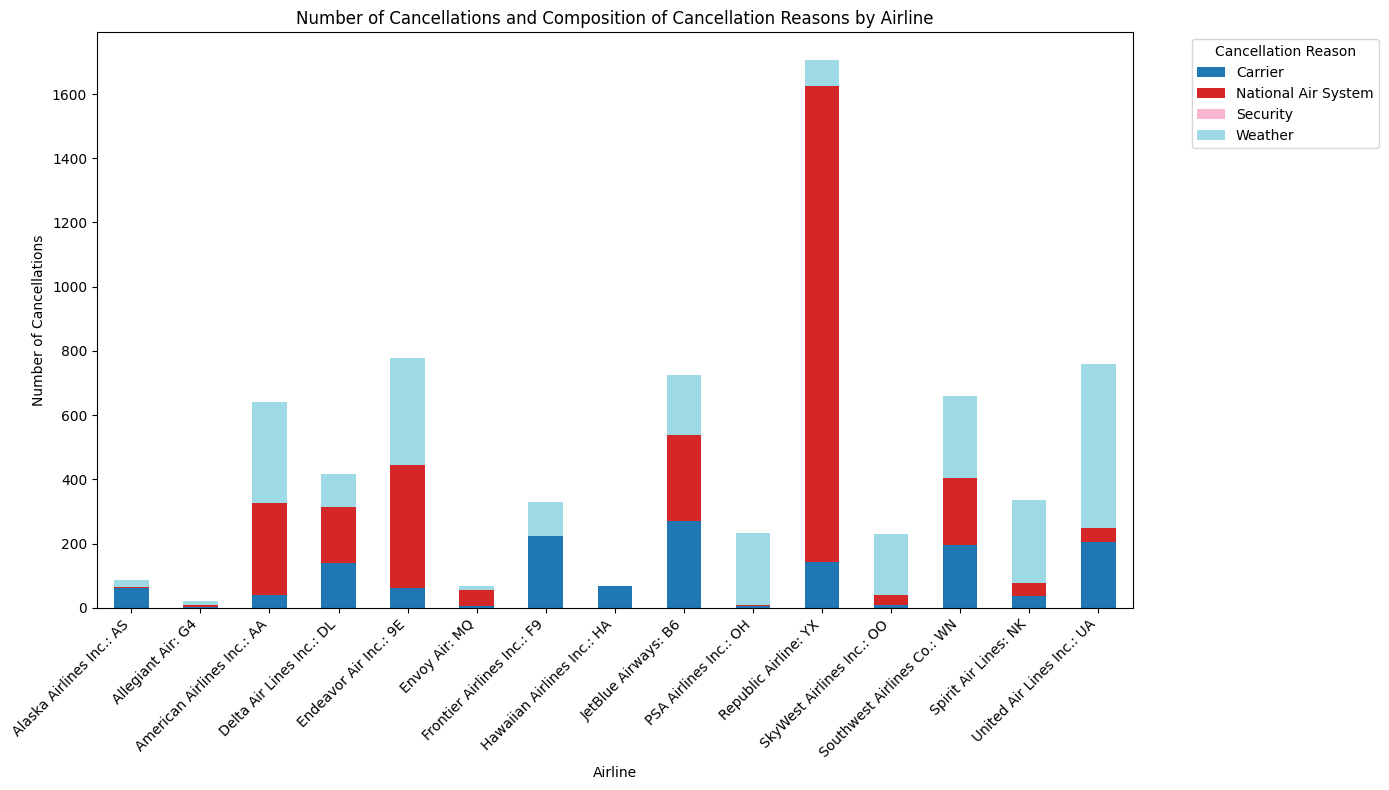

In [10]:
# 1. Merge airline names
df = al_perf.merge(L_AIRLINE_ID, how='left', left_on='DOT_ID_Reporting_Airline', right_on='ID')

# 2. Merge cancellation reason names
df = df.merge(L_CANCELATION, how='left', left_on='CancellationCode', right_on='Code')

# 3. Filter only cancelled flights
cancelled_df = df[df['Cancelled'] == 1]

# 4. Group by airline and cancellation reason
cancel_summary = cancelled_df.groupby(['Name_y', 'Reason']).size().unstack(fill_value=0)

# 5. Calculate total cancellations per airline
cancel_summary['Total_Cancellations'] = cancel_summary.sum(axis=1)


# 7. Plot stacked bar chart (exclude total column for plotting)
cancel_summary.drop(columns='Total_Cancellations').plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

plt.title("Number of Cancellations and Composition of Cancellation Reasons by Airline")
plt.xlabel("Airline")
plt.ylabel("Number of Cancellations")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cancellation Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



# 3. Analysis of Flight Distance 

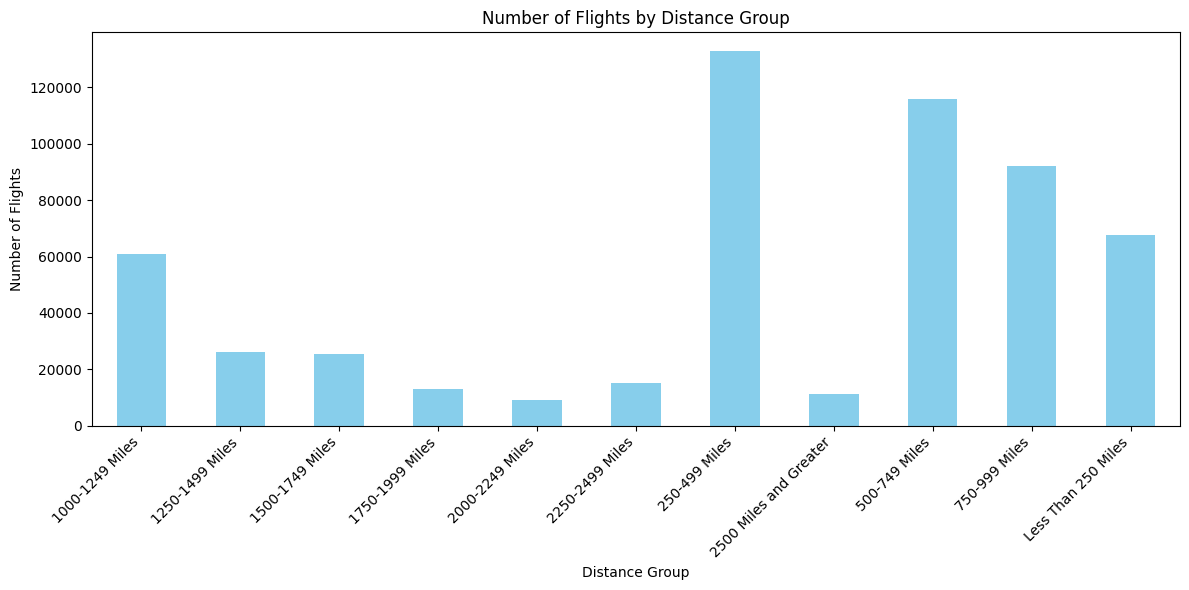

In [14]:
df1 = al_perf.merge(
    L_DISTANCE_GROUP_250,
    how='left',              
    left_on='DistanceGroup', 
    right_on='Code'          
)


distance_counts = df1['DistanceInterval'].value_counts().sort_index()


plt.figure(figsize=(12,6))
distance_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Flights by Distance Group")
plt.xlabel("Distance Group")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


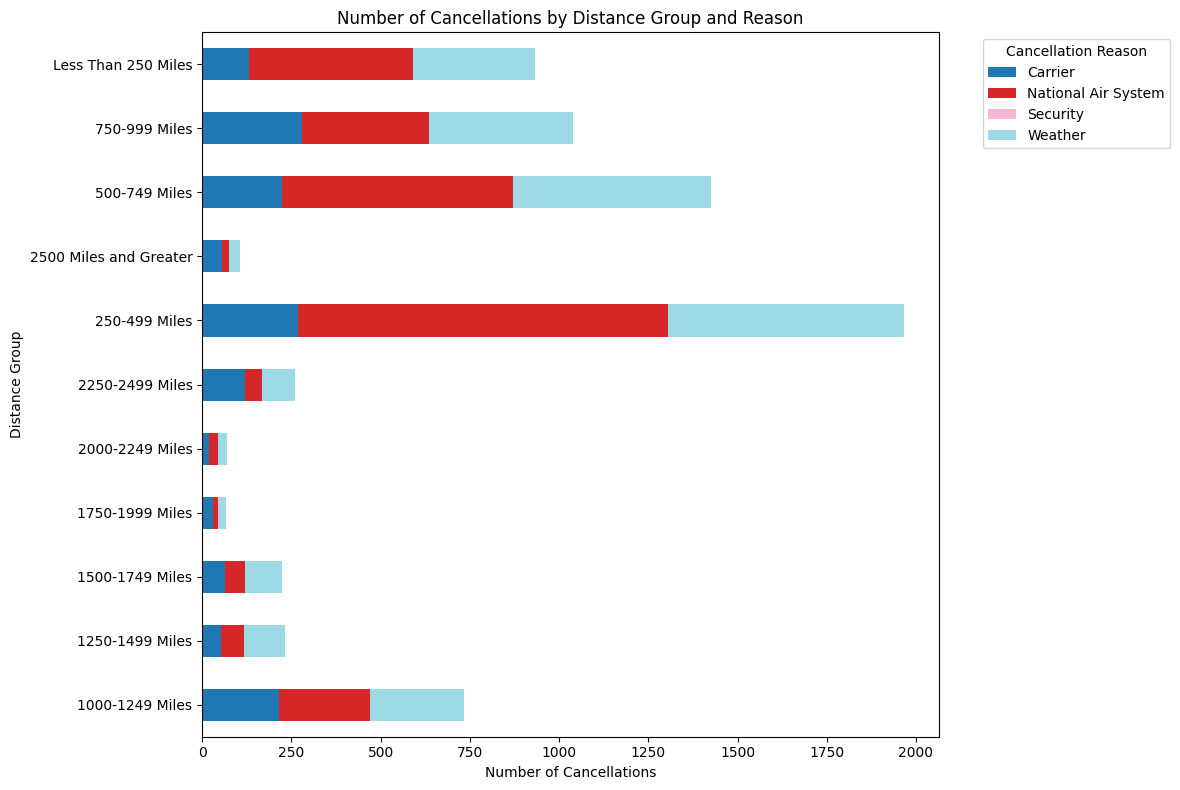

In [22]:
df2 = df1.merge(L_CANCELATION, how='left', left_on='CancellationCode', right_on='Code')
cellled_df = df2[df2['Cancelled'] == 1]

cancel_summary_distance =cellled_df.groupby(['DistanceInterval', 'Reason']).size().unstack(fill_value=0)
plt.figure(figsize=(12,8))

cancel_summary_distance.plot(
    kind='barh',      
    stacked=True,    
    colormap='tab20',
    ax=plt.gca()
)

plt.title("Number of Cancellations by Distance Group and Reason")
plt.xlabel("Number of Cancellations")
plt.ylabel("Distance Group")
plt.legend(title='Cancellation Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




# 4. Analysis of Flight Numbers

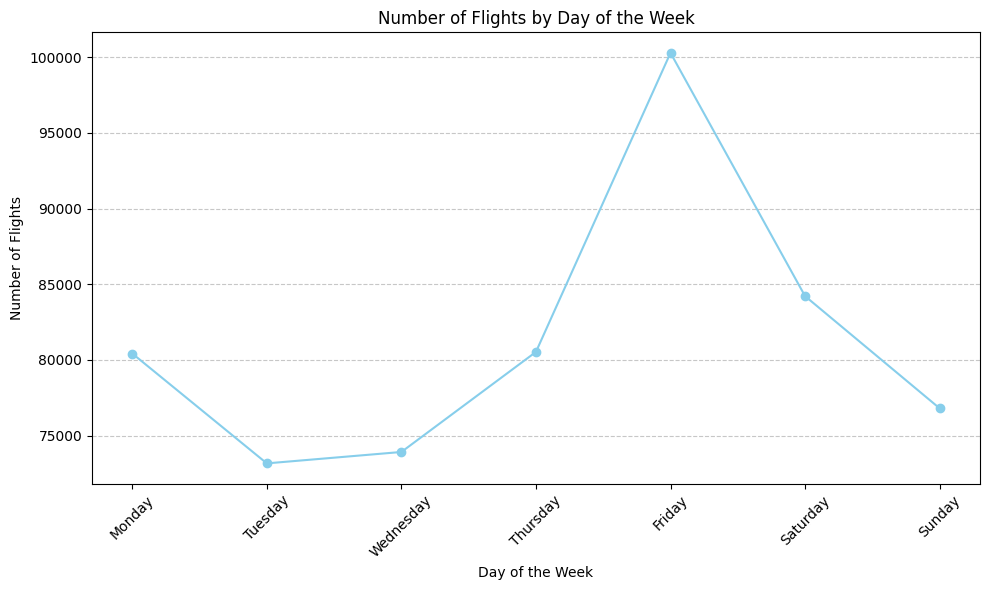

In [26]:

df3 = al_perf.merge(L_WEEKDAYS, how='left', left_on='DayOfWeek', right_on='Code')


flights_per_day = df3.groupby('Day')['FlightDate'].count()


week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
flights_per_day_ordered = flights_per_day.reindex(week_order)


plt.figure(figsize=(10,6))
flights_per_day_ordered.plot(kind='line', marker='o', color='skyblue')
plt.title("Number of Flights by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()






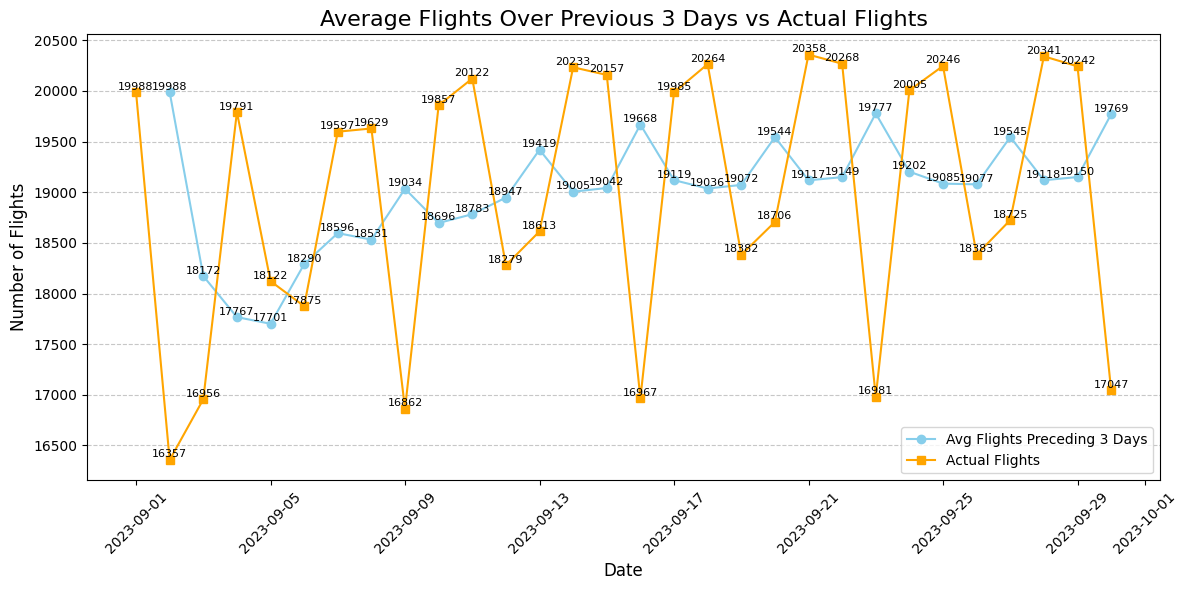

In [ ]:

# Load Q7.csv (3-day average)
df_avg = pd.read_csv("../csv/Q7.csv")
df_avg["date_flight"] = pd.to_datetime(df_avg["date_flight"])

# 从 al_perf 计算每天实际航班数
al_perf["FlightDate"] = pd.to_datetime(al_perf["FlightDate"])
daily_flights = al_perf.groupby("FlightDate").size().reset_index(name="Flights")

# 合并每日实际航班数和三天平均
df_plot = pd.merge(df_avg, daily_flights, left_on="date_flight", right_on="FlightDate", how="left")

# 绘图
plt.figure(figsize=(12,6))

# 平均过去3天
plt.plot(df_plot["date_flight"], df_plot["Avg_Flights_Preceding_3_Days"], marker='o', color='skyblue', label='Avg Flights Preceding 3 Days')

# 当天航班数
plt.plot(df_plot["date_flight"], df_plot["Flights"], marker='s', color='orange', label='Actual Flights')

# 在每个点上加数值
for x, y in zip(df_plot["date_flight"], df_plot["Avg_Flights_Preceding_3_Days"]):
    plt.text(x, y + 5, f"{y:.0f}", ha='center', va='bottom', fontsize=8)

for x, y in zip(df_plot["date_flight"], df_plot["Flights"]):
    plt.text(x, y + 5, f"{y}", ha='center', va='bottom', fontsize=8)

plt.title("Average Flights Over Previous 3 Days vs Actual Flights", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Flights", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

